In [61]:
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt

In [62]:
N = 10**5
L = 10**3
p_crit = [1, 10**3]

L_i = [0] * N
N_i = [[0] * L, [0] * L]
p_i = [0] * L
# Assigning a random label for each agent (We suppose that the previous label is also random)
for i in range(N):
    N_i[0][random.randint(0, L-1)] += 1
    L_i[i] = random.randint(0, L-1)
    N_i[1][L_i[i]] += 1
# Calculating the momentum of each label
for i in range(L):
    p_i[i] = N_i[1][i] - N_i[0][i]

N_i[0] = N_i[1].copy()

mean_size = [[0] * L, [0] * L]

In [63]:
for p_index, pc in enumerate(p_crit):
    for t in range(100):
        for _ in range(N):
            i = random.randint(0, N - 1)
            j = random.randint(0, N - 1)
            if p_i[L_i[j]] > p_i[L_i[i]]:
                N_i[1][L_i[i]] -= 1
                N_i[1][L_i[j]] += 1
                L_i[i] = L_i[j]
            elif p_i[L_i[i]] < pc:
                k = random.randint(0, L-1)
                if N_i[1][k] == 0:
                    N_i[1][L_i[i]] -= 1
                    N_i[1][k] += 1
                    L_i[i] = k
        for i in range(L):
            p_i[i] = N_i[1][i] - N_i[0][i]
            mean_size[p_index][i] += N_i[1][i]
        N_i[0] = N_i[1].copy()

        t += 1

In [64]:
for i in range(L):
    mean_size[0][i] = int(mean_size[0][i]/200)
    mean_size[1][i] = int(mean_size[1][i]/200)

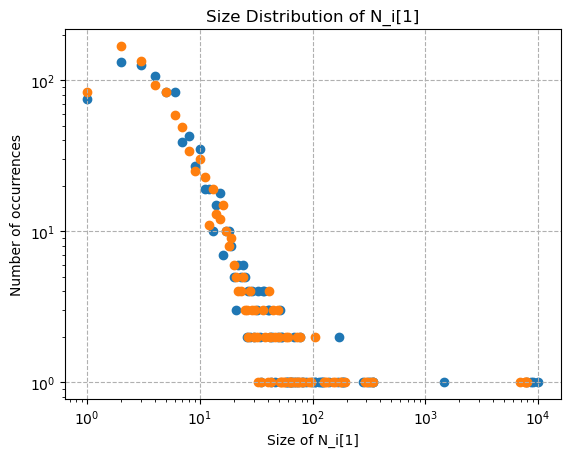

In [65]:
size_counts = Counter(mean_size[0])
# Step 3: Plot the scatter plot (Size vs. Count)
sizes = list(size_counts.keys())
counts = list(size_counts.values())

plt.scatter(sizes, counts)

size_counts = Counter(mean_size[1])
# Step 3: Plot the scatter plot (Size vs. Count)
sizes = list(size_counts.keys())
counts = list(size_counts.values())

plt.scatter(sizes, counts)

plt.xlabel('Size of N_i[1]')
plt.ylabel('Number of occurrences')
plt.title('Size Distribution of N_i[1]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--')
plt.show()